## GNOD music recommender


#### Business goal and short summarise:

We are presenting to GNOD a project for a new music recommendator, not only for bands, as they already have in Gnoosic, but also for songs for their users. The idea is to give users 2 new possibilities when searching for recommendations: songs that are similar to the ones they picked from an acoustic point of view, and songs that are popular around the world right now independently from their tastes. 

We are going to use API from Spotify to collect as much data as possible. Once the data is collected, we want to create clusters of songs that are similar to each other. Finally, we are building a tool that will take a song as an input from the user, this song will match with one of the clusters we created, and the tool will prioritize giving the user an output recommendation of a song from that same cluster. 

In order to start, we want to explore and we are going to directly scrape the web and get a few hundreds from an online site and see if we can apply process with a small sample. 

So here we go scraping a first shot of hot songs from Billboard. 



<h1 id="Our project step by step">Our project step by step</h1>
<div id="toc"></div>


### Stage 1: Shaping the process and designing a first prototype

#### Importing needed libraries and reading the url

In [1]:
# 1. importing libraries- BeautifulSoup, requests, pandas

from bs4 import BeautifulSoup
import requests 
import pandas as pd 


# 2. find url and store it in avariable
url = "https://www.billboard.com/charts/hot-100"

# 3. download html with a get request
response = requests.get(url)

In [2]:
#check response status code 
response.status_code

200

#### Getting the soup

In [3]:
#parse and store the contents of the url call
soup=BeautifulSoup(response.content, 'html.parser')

In [4]:
#prettify the soup 
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<html class="" lang="">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>
<title>The Hot 100 Chart | Billboard</title>
<meta content="The Hot 100 Chart" name="title" property="title">
<meta content="@billboard" name="twitter:site"/>
<meta content="Billboard" property="og:site_name">
<meta content="article" property="og:type">
<link href="/manifest.json" rel="manifest"/>
<style>
        .chart-pro-access {
            background-image: url('https://www.billboard.com/assets/1624920239/images/piano/chart-pro-access-mb.png?f6703e6e916109f2bd9b');
        }

        @media (min-width: 769px) {
            .chart-pro-access {
                background-image: url('https://www.billboard.com/assets/1624920239/images/piano/chart-pro-access-dk.png?f6703e6e916109f2bd9b');
            }
        }
    </style>
<script async="async

#### Finding a method working for one song

In [5]:
soup.select("span.chart-element__information__song")[4].text

'Montero (Call Me By Your Name)'

In [6]:
soup.select("span.chart-element__information__artist")[4].text

'Lil Nas X'

#### Applying for all the songs in Hot 100 

In [7]:
# 'for loop' for extracting the songs
title_list=soup.select("span.chart-element__information__song")

In [8]:
for i in range(len(title_list)):
    print(soup.select("span.chart-element__information__song")[i].text)

Butter
Good 4 U
Levitating
Kiss Me More
Montero (Call Me By Your Name)
Bad Habits
Leave The Door Open
Peaches
Save Your Tears
Deja Vu
Astronaut In The Ocean
Rapstar
You Right
Am I The Only One
Blinding Lights
Without You
Thot Shit
Forever After All
Heartbreak Anniversary
Fancy Like
Every Chance I Get
Famous Friends
Beautiful Mistakes
Best Friend
Lil Bit
Single Saturday Night
Heat Waves
Leave Before You Love Me
Wants And Needs
Yonaguni
Blame It On You
Late At Night
Drivers License
Telepatia
Glad You Exist
Mood
Wockesha
Traitor
Todo de Ti
Drinkin' Beer. Talkin' God. Amen.
Ain't Shit
pov
My Ex's Best Friend
WUSYANAME
Calling My Phone
Beggin'
Ball If I Want To
Gone
Wasting Time
Red Light Green Light
Things A Man Oughta Know
Favorite Crime
Settling Down
Way Less Sad
Straightenin
Ski
AM
Arcade
Happier
You
my.life
Chasing After You
Drunk (And I Don't Wanna Go Home)
Need To Know
Track Star
One Too Many
Hats Off
Brutal
Build A Bitch
Breaking Up Was Easy In The 90's
Country Again
Fiel
Renegade
W

In [9]:
# extracting the artists
artist_list=soup.select("span.chart-element__information__artist")

In [10]:
for i in range(len(artist_list)):
    print(soup.select("span.chart-element__information__artist")[i].text)

BTS
Olivia Rodrigo
Dua Lipa Featuring DaBaby
Doja Cat Featuring SZA
Lil Nas X
Ed Sheeran
Silk Sonic (Bruno Mars & Anderson .Paak)
Justin Bieber Featuring Daniel Caesar & Giveon
The Weeknd & Ariana Grande
Olivia Rodrigo
Masked Wolf
Polo G
Doja Cat & The Weeknd
Aaron Lewis
The Weeknd
The Kid LAROI
Megan Thee Stallion
Luke Combs
Giveon
Walker Hayes
DJ Khaled Featuring Lil Baby & Lil Durk
Chris Young + Kane Brown
Maroon 5 Featuring Megan Thee Stallion
Saweetie Featuring Doja Cat
Nelly & Florida Georgia Line
Cole Swindell
Glass Animals
Marshmello X Jonas Brothers
Drake Featuring Lil Baby
Bad Bunny
Jason Aldean
Roddy Ricch
Olivia Rodrigo
Kali Uchis
Dan + Shay
24kGoldn Featuring iann dior
Moneybagg Yo
Olivia Rodrigo
Rauw Alejandro
Chase Rice Featuring Florida Georgia Line
Doja Cat
Ariana Grande
Machine Gun Kelly X blackbear
Tyler, The Creator Featuring YoungBoy Never Broke Again & Ty Dolla $ign
Lil Tjay Featuring 6LACK
Maneskin
DaBaby
Dierks Bentley
Brent Faiyaz Featuring Drake
DaBaby
Lainey 

#### Joining the 2 lists and storing in a DataFrame

In [11]:
songs=[]
artists=[]
len_songs=len(soup.select("span.chart-element__information__song"))

In [12]:
for i in range(len_songs):
    songs.append(soup.select("span.chart-element__information__song")[i].text)
    artists.append(soup.select("span.chart-element__information__artist")[i].text)

In [13]:
len(songs)

100

In [14]:
len(artists)

100

In [15]:
songs_hot100=pd.DataFrame({"song":songs,"artist":artists})

In [16]:
songs_hot100.shape

(100, 2)

In [17]:
songs_hot100.head(10)

,song,artist
0,Butter,BTS
1,Good 4 U,Olivia Rodrigo
2,Levitating,Dua Lipa Featuring DaBaby
3,Kiss Me More,Doja Cat Featuring SZA
4,Montero (Call Me By Your Name),Lil Nas X
5,Bad Habits,Ed Sheeran
6,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak)
7,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon
8,Save Your Tears,The Weeknd & Ariana Grande
9,Deja Vu,Olivia Rodrigo


#### First Prototype

In [18]:
from random import randint

song=input('Tell us a hot song you like: ').title()
contains=songs_hot100[songs_hot100['song'].str.contains(song)]

if len(contains) == 0:
    print('This is not a hot song, sorry')
else:
    check=input('Did you mean ' + contains['song'].values[0] + ' by ' + contains['artist'].values[0] + '? ')
    
    if check == 'yes':
        print('This is a hot song, maybe you like:')
        random_song=randint(0,len(songs_hot100)-1)
        print(songs_hot100['song'][random_song] + ' by ' + songs_hot100['artist'][random_song])
    else:
        print('Sorry, try another song')
    

Tell us a hot song you like: Butter
Did you mean Butter by BTS? yes
This is a hot song, maybe you like:
We Didn't Have Much by Justin Moore


In [19]:
songs_hot100.to_csv('songs_hot100.csv', index=False)

### Stage 2: Collecting the data

#### Importing needed libraries for this stage

In [20]:
import spotipy # install if needed
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
from time import sleep

#### Getting credentials for using the Spotify's API

In [21]:
client_id=str(getpass.getpass('client_id?'))
client_secret=str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


In [22]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

#### Collecting the data from selected playlists

In [23]:
# Storing the playlists' id

pl_id_1 = "5S8SJdl1BDc0ugpkEvFsIL"
pl_id_2 = "7I6XVNQVayB46Zzh4GNPoU"
pl_id_3 = "532F1h299qKD894BlPfJJF"
pl_id_4 = "3WWv2APRYe9jR8L1YnK1Up"

#### Getting a list from each playlist

In [24]:
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify", playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [25]:
playlist_1 = get_playlist_tracks(pl_id_1)
playlist_2 = get_playlist_tracks(pl_id_2)
playlist_3 = get_playlist_tracks(pl_id_3)
playlist_4 = get_playlist_tracks(pl_id_4)

#### Looking for id, title and artist from a single song

In [26]:
playlist_2[0]['track']['id']   # id

'1lpLrlyweOShEKXT1bpcDd'

In [27]:
playlist_2[0]['track']['artists'][0]['name']   # artist

'Joy Again'

In [28]:
playlist_2[0]['track']['name']   # title

'Looking Out for You'

#### Listing id, title and artist for all the songs

In [29]:
_id = []
title = []
artist = []

In [30]:
def get_id_title_artist(pl):
    for item in range(len(pl)):
        _id.append(pl[item]['track']['id'])
        title.append(pl[item]['track']['name'])
        artist.append(pl[item]['track']['artists'][0]['name'])

In [31]:
get_id_title_artist(playlist_1)
get_id_title_artist(playlist_2)
get_id_title_artist(playlist_3)
get_id_title_artist(playlist_4)

#### Creating a DataFrame for id, title and artist  (info)

In [32]:
len(_id)

35664

In [33]:
len(artist)

35664

In [34]:
len(title)

35664

In [35]:
info = pd.DataFrame({'id' : _id, 'title' : title, 'artist' : artist})

In [36]:
info.shape

(35664, 3)

In [37]:
info.drop_duplicates() # dealing with duplicates

,id,title,artist
0,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift
1,4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett
2,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars
3,0afhq8XCExXpqazXczTSve,Galway Girl,Ed Sheeran
4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,Ed Sheeran
...,...,...,...
35659,3kOl8elYophLlBuDIaH8gb,Pyretta Blaze,Type O Negative
35660,6jTpj6yGuX2Bp8L21GD4pf,All Hallows Eve,Type O Negative
35661,2PPCAZ1iB0a2lS1NeWU1f9,Day Tripper - Medley,Type O Negative
35662,4FR4Fcyd8JNdhsHKSTUpnR,Neverland,Van Canto


In [38]:
info.shape # there are no duplicates

(35664, 3)

#### Getting audio features for all the songs

The first idea was building a for loop in order to get all audio features in one go. But we finally need to go from lot to lot because it gives error and it doesn't allow us to do that. So we run the next code 9 times, 1 for every lot of songs, and we have stored them in data frames.

In [ ]:
features = []

for song in _id:
    #sleep(0.25)
    audio = sp.audio_features(tracks=song)
    features.append(audio[0])

In [ ]:
df = pd.DataFrame(features)

#### Concatenating the DataFrames

In [40]:
df1 = pd.read_csv('../df1.csv')
df2 = pd.read_csv('../df1_2.csv')
df3 = pd.read_csv('../df_2_1.csv')
df4 = pd.read_csv('../df_2_3.csv')
df5 = pd.read_csv('../df_2_4.csv')
df6 = pd.read_csv('../df3.csv')
df7 = pd.read_csv('../df_4_1.csv')
df8 = pd.read_csv('../df4_2.csv')
df9 = pd.read_csv('../df_4_3.csv')

In [41]:
audio=pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [42]:
audio = audio.drop_duplicates(subset=['id'])

In [43]:
audio.shape

(25477, 19)

In [44]:
len(audio['id'].unique())

25477

In [45]:
len(info['id'].unique())

34588

In [46]:
info=info.drop_duplicates(subset=['title'])

In [47]:
songs = pd.merge(info, audio, on="id")

In [48]:
songs

,id,title,artist,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,0,0.615,0.779,2,-6.454,1,0.1350,...,0.000000,0.1550,0.4530,160.000,audio_features,spotify:track:7zgqtptZvhf8GEmdsM2vp2,https://api.spotify.com/v1/tracks/7zgqtptZvhf8...,https://api.spotify.com/v1/audio-analysis/7zgq...,208198,4
1,4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett,1,0.687,0.845,7,-4.370,1,0.0576,...,0.000000,0.0452,0.8090,87.972,audio_features,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,190227,4
2,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,2,0.818,0.803,1,-4.282,1,0.0797,...,0.000000,0.1530,0.6320,106.970,audio_features,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,225983,4
3,0afhq8XCExXpqazXczTSve,Galway Girl,Ed Sheeran,3,0.624,0.876,9,-3.374,1,0.1000,...,0.000000,0.3270,0.7810,99.943,audio_features,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,170827,4
4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,Ed Sheeran,4,0.614,0.379,4,-10.480,1,0.0476,...,0.000464,0.0986,0.2010,107.989,audio_features,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21228,4TqEj3UMHMyqQuxdJbhgyr,Angry Inch,Type O Negative,3965,0.451,0.993,1,-6.208,0,0.2740,...,0.004100,0.2230,0.0840,97.164,audio_features,spotify:track:4TqEj3UMHMyqQuxdJbhgyr,https://api.spotify.com/v1/tracks/4TqEj3UMHMyq...,https://api.spotify.com/v1/audio-analysis/4TqE...,219067,4
21229,2U55GjnIRxmKSAxl92JpDR,Anesthesia,Type O Negative,3966,0.331,0.849,9,-9.006,1,0.1090,...,0.391000,0.2650,0.1550,137.405,audio_features,spotify:track:2U55GjnIRxmKSAxl92JpDR,https://api.spotify.com/v1/tracks/2U55GjnIRxmK...,https://api.spotify.com/v1/audio-analysis/2U55...,401187,4
21230,25dSUnpUZ1qsWVyYjCQg6d,Drunk in Paris,Type O Negative,3967,0.217,0.817,11,-9.564,1,0.0744,...,0.911000,0.4870,0.0561,145.070,audio_features,spotify:track:25dSUnpUZ1qsWVyYjCQg6d,https://api.spotify.com/v1/tracks/25dSUnpUZ1qs...,https://api.spotify.com/v1/audio-analysis/25dS...,87467,5
21231,5IY7Xa9nKEljsEOehXf7AO,The Dream Is Dead,Type O Negative,3968,0.365,0.945,11,-6.227,1,0.0992,...,0.021500,0.4230,0.1720,137.660,audio_features,spotify:track:5IY7Xa9nKEljsEOehXf7AO,https://api.spotify.com/v1/tracks/5IY7Xa9nKElj...,https://api.spotify.com/v1/audio-analysis/5IY7...,307200,4


In [49]:
songs = songs.drop(songs.columns[[3]], axis='columns')

In [50]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21233 entries, 0 to 21232
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21233 non-null  object 
 1   title             21233 non-null  object 
 2   artist            21233 non-null  object 
 3   danceability      21233 non-null  float64
 4   energy            21233 non-null  float64
 5   key               21233 non-null  int64  
 6   loudness          21233 non-null  float64
 7   mode              21233 non-null  int64  
 8   speechiness       21233 non-null  float64
 9   acousticness      21233 non-null  float64
 10  instrumentalness  21233 non-null  float64
 11  liveness          21233 non-null  float64
 12  valence           21233 non-null  float64
 13  tempo             21233 non-null  float64
 14  type              21233 non-null  object 
 15  uri               21233 non-null  object 
 16  track_href        21233 non-null  object

### Stage 3: Clustering

#### Importing needed libraries for this stage

In [51]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Exploring distributions for audio features

In [52]:
X_df = songs.select_dtypes(include='float')

In [53]:
X_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.615,0.779,-6.454,0.1350,0.06650,0.000000,0.1550,0.4530,160.000
1,0.687,0.845,-4.370,0.0576,0.10000,0.000000,0.0452,0.8090,87.972
2,0.818,0.803,-4.282,0.0797,0.03400,0.000000,0.1530,0.6320,106.970
3,0.624,0.876,-3.374,0.1000,0.07350,0.000000,0.3270,0.7810,99.943
4,0.614,0.379,-10.480,0.0476,0.60700,0.000464,0.0986,0.2010,107.989
...,...,...,...,...,...,...,...,...,...
21228,0.451,0.993,-6.208,0.2740,0.02320,0.004100,0.2230,0.0840,97.164
21229,0.331,0.849,-9.006,0.1090,0.07930,0.391000,0.2650,0.1550,137.405
21230,0.217,0.817,-9.564,0.0744,0.76800,0.911000,0.4870,0.0561,145.070
21231,0.365,0.945,-6.227,0.0992,0.03420,0.021500,0.4230,0.1720,137.660


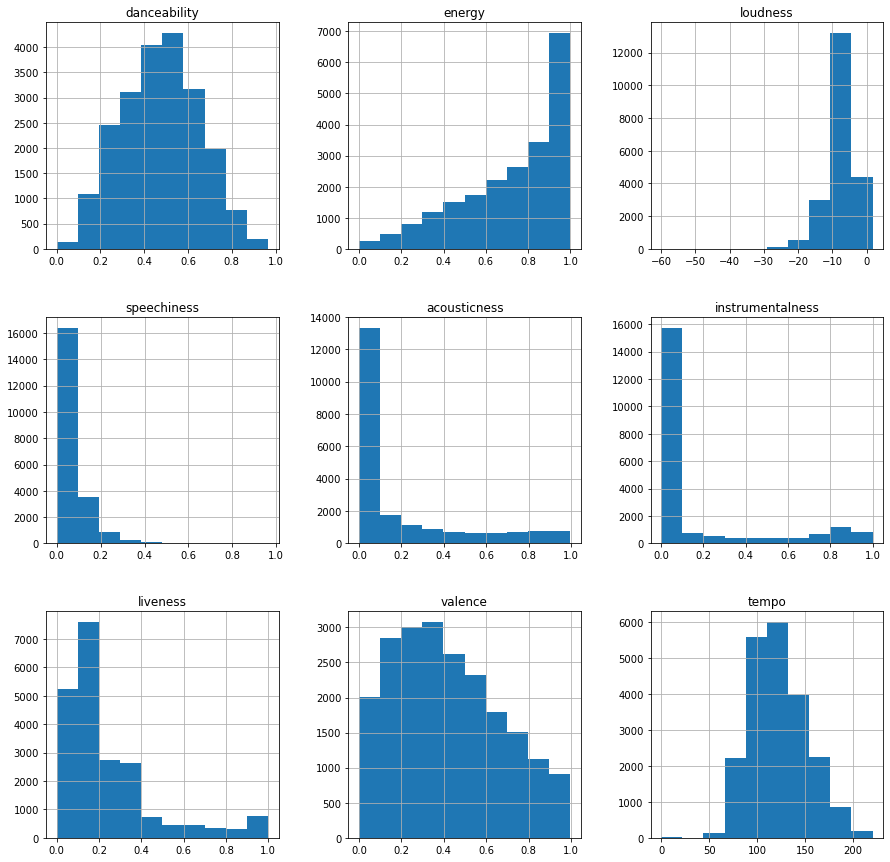

In [54]:
X_df.hist(figsize=(15,15));

#### Scaling audio features

In [55]:
scaler = StandardScaler()

In [56]:
scaler.fit(X_df)

StandardScaler()

In [57]:
X_scaled = scaler.transform(X_df)

In [58]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_df.columns)

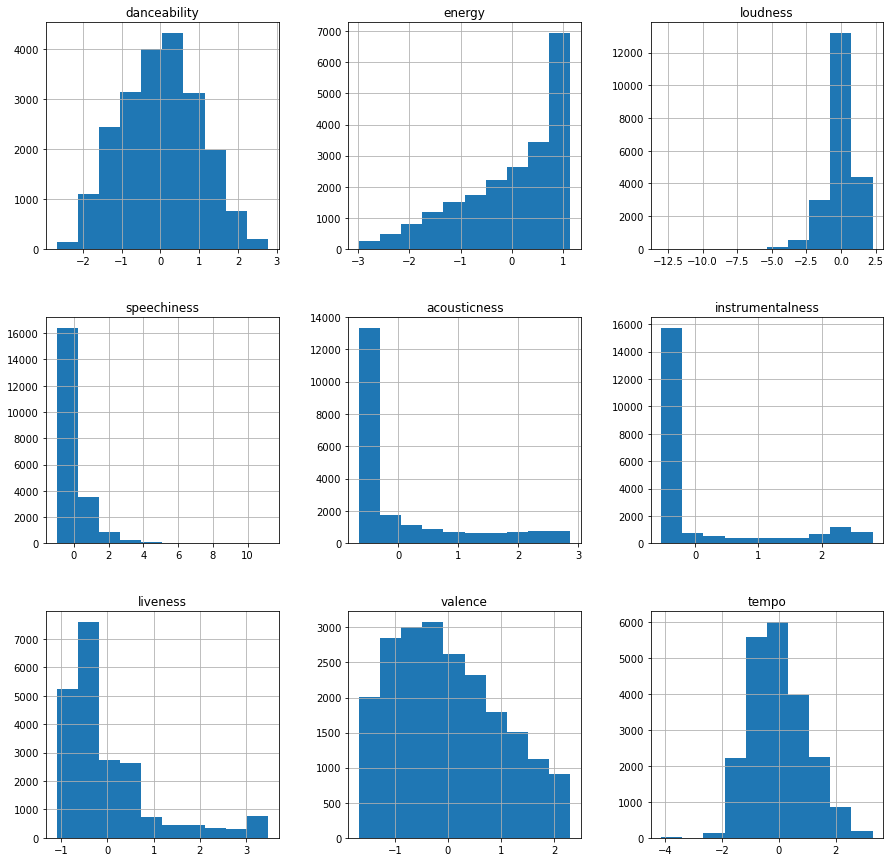

In [59]:
X_scaled_df.hist(figsize=(15,15));

#### Creating the clusters

In [60]:
#define the model, fit the model to your data

kmeans = KMeans(n_clusters=8, random_state=40)
kmeans.fit(X_scaled)

KMeans(random_state=40)

In [61]:
#look at the cluster centres

kmeans.cluster_centers_

# Predicting / assigning the clusters:

clusters=kmeans.predict(X_scaled)

# Check the size of the clusters

pd.Series(clusters).value_counts().sort_index()

# Explore the cluster assignment by placing it in the original dataset

X_cluster=pd.DataFrame(X_df)
X_cluster["cluster"]=clusters
X_cluster.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.615,0.779,-6.454,0.1350,0.0665,0.000000,0.1550,0.453,160.000,4
1,0.687,0.845,-4.370,0.0576,0.1000,0.000000,0.0452,0.809,87.972,6
2,0.818,0.803,-4.282,0.0797,0.0340,0.000000,0.1530,0.632,106.970,6
3,0.624,0.876,-3.374,0.1000,0.0735,0.000000,0.3270,0.781,99.943,6
4,0.614,0.379,-10.480,0.0476,0.6070,0.000464,0.0986,0.201,107.989,2
5,0.768,0.517,-4.323,0.0312,0.1860,0.000038,0.1040,0.418,104.992,6
6,0.612,0.280,-8.648,0.0434,0.9320,0.000000,0.0880,0.387,72.795,2
7,0.415,0.538,-12.710,0.0368,0.4000,0.767000,0.0674,0.449,95.121,7
8,0.776,0.620,-6.198,0.0670,0.3410,0.000000,0.0978,0.427,100.025,6
9,0.781,0.445,-6.061,0.0295,0.4740,0.000000,0.1840,0.591,78.998,6


In [62]:
kmeans.inertia_

83830.8436009739

In [63]:
K = range(2,30)

In [64]:
inertia = []

for k in K:
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

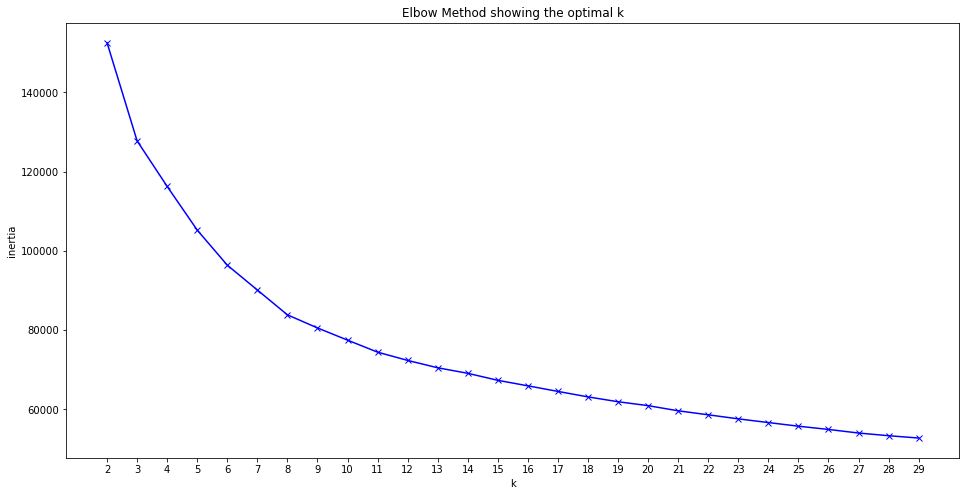

In [65]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [67]:
from sklearn.metrics import silhouette_score

K = range(10, 30)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_scaled)
    silhouettes.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))

Text(0, 0.5, 'silhouette score')

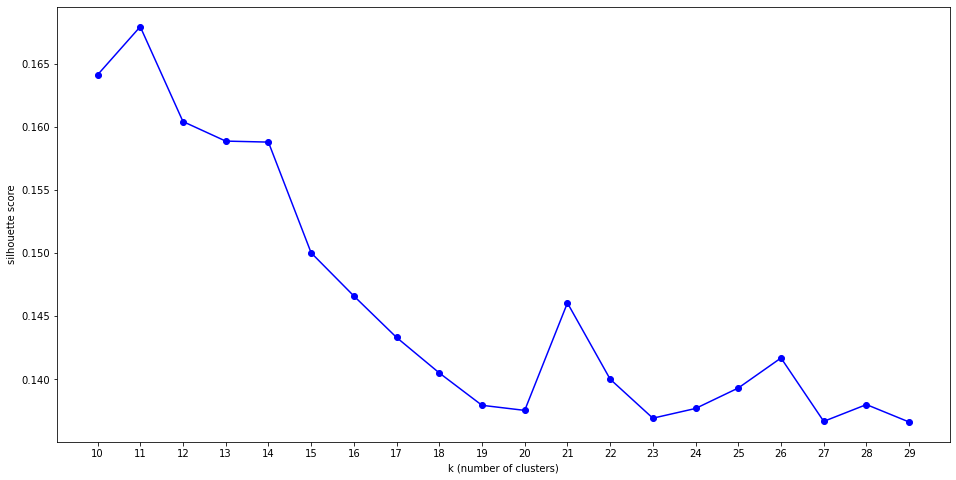

In [68]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')

In [69]:
kmeans = KMeans(n_clusters=11, random_state=40)
kmeans.fit(X_scaled)

KMeans(n_clusters=11, random_state=40)

In [70]:
kmeans.cluster_centers_
clusters=kmeans.predict(X_scaled)
pd.Series(clusters).value_counts().sort_index()
X_cluster=pd.DataFrame(X_df)
X_cluster["cluster"]=clusters
X_cluster.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.615,0.779,-6.454,0.1350,0.0665,0.000000,0.1550,0.453,160.000,2
1,0.687,0.845,-4.370,0.0576,0.1000,0.000000,0.0452,0.809,87.972,10
2,0.818,0.803,-4.282,0.0797,0.0340,0.000000,0.1530,0.632,106.970,10
3,0.624,0.876,-3.374,0.1000,0.0735,0.000000,0.3270,0.781,99.943,10
4,0.614,0.379,-10.480,0.0476,0.6070,0.000464,0.0986,0.201,107.989,4
5,0.768,0.517,-4.323,0.0312,0.1860,0.000038,0.1040,0.418,104.992,0
6,0.612,0.280,-8.648,0.0434,0.9320,0.000000,0.0880,0.387,72.795,4
7,0.415,0.538,-12.710,0.0368,0.4000,0.767000,0.0674,0.449,95.121,7
8,0.776,0.620,-6.198,0.0670,0.3410,0.000000,0.0978,0.427,100.025,0
9,0.781,0.445,-6.061,0.0295,0.4740,0.000000,0.1840,0.591,78.998,3


In [71]:
kmeans.inertia_

74407.80134324126

### Stage 4: Final prototype 

In [72]:
songs_recommend = pd.DataFrame({'id' : songs['id'], 'title' : songs['title'], 'artist' : songs['artist'], 'cluster' : X_cluster['cluster']})

In [73]:
songs_recommend

,id,title,artist,cluster
0,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,2
1,4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett,10
2,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,10
3,0afhq8XCExXpqazXczTSve,Galway Girl,Ed Sheeran,10
4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,Ed Sheeran,4
...,...,...,...,...
21228,4TqEj3UMHMyqQuxdJbhgyr,Angry Inch,Type O Negative,6
21229,2U55GjnIRxmKSAxl92JpDR,Anesthesia,Type O Negative,8
21230,25dSUnpUZ1qsWVyYjCQg6d,Drunk in Paris,Type O Negative,8
21231,5IY7Xa9nKEljsEOehXf7AO,The Dream Is Dead,Type O Negative,6


In [74]:
hot_songs = pd.read_csv('songs_hot100.csv')

#### Final prototype

In [101]:
def hot_recommender():
    user_song = input("Tell us a song you like: ").title()
    if songs_hot100['song'].str.contains(user_song).any():
        print("Nice song! Do you know " + songs_hot100.sample(n=1)["song"].item() + " by " + hot_songs.sample(n=1)["artist"].item() + "? I'm sure you will like it!")
    
    else:
        results = sp.search(q=user_song, limit=1)
        user_id = results['tracks']['items'][0]['id']
        user_audio = sp.audio_features(tracks=user_id)
        patata = pd.DataFrame(user_audio[0], index=[0])[X_df.drop(['cluster'], axis=1).columns]
        user_scaled = scaler.transform(patata)
        user_cluster = kmeans.predict(user_scaled)
        recommendation = songs_recommend[songs_recommend['cluster']==user_cluster[0]].sample(n=1)["title"].item()
        artist = songs_recommend[songs_recommend['title']==recommendation]['artist']
        print("Nice song! Do you know " + recommendation.upper() +  " by " + artist + "? I'm sure you will like it!")

In [105]:
hot_recommender()

Tell us a song you like: don't stop me now
16116    Nice song! Do you know PEACE SELLS - LIVE AT T...
Name: artist, dtype: object


In [107]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>